RC: 5.992035343772849e-07
R: 5000000.0
C: 1.19840706875457e-13
E: 2.3419203394426326e-13


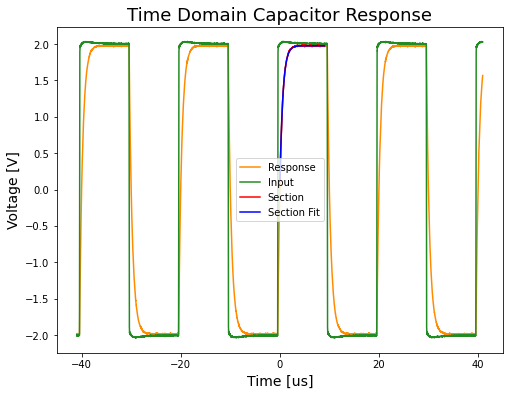

In [1]:
import csv, os
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt

def read_ads(filename):
    time = []
    ch1 = []
    ch2 = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for idx in range(20):
            next(reader)
        for row in reader:
            time.append(float(row[0]))
            ch1.append(float(row[1]))
            ch2.append(float(row[2]))

    return np.array(time), np.array(ch1), np.array(ch2)

def RC_ads(x, V0, tau, shift):
    return V0 * (1 - np.exp(-(x-shift) / tau))

time, ch1, ch2 = read_ads(R'D:\Local Documents\Research\Khalid\CNT Capacitance Measurements\Cap Characterization\Time Domain Metal Line.csv')

time_micro = time * 10**6
plt.figure(figsize=(8,6))
plt.plot(time_micro, ch1, 'darkorange', label='Response')
plt.plot(time_micro, ch2, 'forestgreen', label='Input')

lower = 4100
upper = 5000
guess = 5, 1e-6, 0
params, cov = opt.curve_fit(RC_ads, time[lower:upper], ch1[lower:upper], guess)
print('RC:', params[1])
Rp = 5e6
Rs = 1e4
# R = Rs*Rp / (Rs + Rp)
R = Rp
print('R:', R)
C = params[1] / R
print('C:', C)
E = 0.5 * C * (params[0])**2
print('E:', E)
plt.plot(time_micro[lower:upper], ch1[lower:upper], 'red', label='Section')
plt.plot(time_micro[lower:upper], RC_ads(time[lower:upper], *params), 'blue', label='Section Fit')

plt.xlabel('Time [us]', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.title('Time Domain Capacitor Response', fontsize=18)
plt.legend()
# plt.savefig(R'D:\Local Documents\Research\Khalid\CNT Capacitance Measurements\Cap Characterization\Metal Line Time Domain Response.png', bbox_inches='tight')
plt.show()

In [15]:
f3db = 275.3e3
C = np.sqrt(Rp**2 + Rs**2 + 2 * Rs * Rp) / (2*np.pi * Rs * Rp * f3db)
print('C:', C)

C: 5.786926917362413e-11


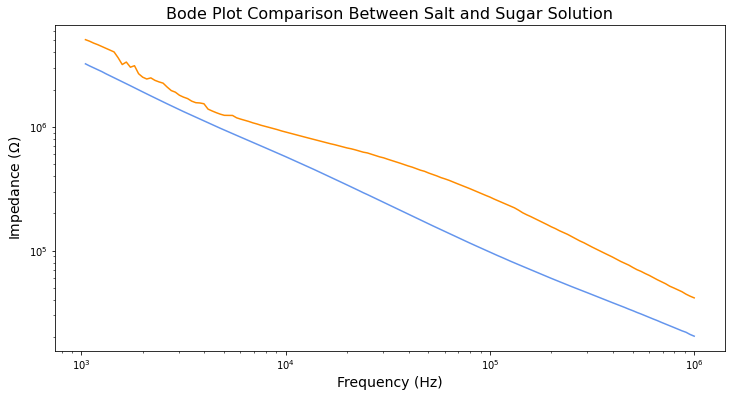

In [11]:
def read_ads_2(filename):
    time = []
    ch1 = []
    ch2 = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for idx in range(48):
            next(reader)
        for row in reader:
            time.append(float(row[0]))
            ch1.append(float(row[1]))
            ch2.append(float(row[2]))

    return np.array(time), np.array(ch1), np.array(ch2)

time, ch1, ch2 = read_ads_2(R'D:\Local Documents\Research\Khalid\New Microfluidics Testing\Data Salt and Sugar.csv')
plt.figure(figsize=(12,6))
plt.plot(time,ch1,color='darkorange', label='Salt')
plt.plot(time,ch2,color='cornflowerblue', label='Sugar')
plt.yscale('log')
plt.xscale('log')
plt.title('Bode Plot Comparison Between Salt and Sugar Solution', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.savefig(R'D:\Local Documents\Research\Khalid\New Microfluidics Testing\Salt and Sugar Plot.png', dpi=300, bbox_inches='tight')
plt.show()